In [1]:
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Run parse_PET_file.py 

### Start ML process to reduce number of Monthly Factors that affect Crude Oil Prices
#### Data Exploration notebook shows 54267 Monthly factors

In [3]:
monthly_crude = pd.read_csv('./monthly_crude_data.csv',index_col='index')
monthly_crude.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 1920-01-31 to 2017-04-30
Columns: 54267 entries, PET.RCLC3.M to PET.EMA_EPM0X_PRA_SMI_DPG.M
dtypes: float64(54267)
memory usage: 483.6+ MB


### Lets look at the Monthly Data

In [8]:
monthly_crude.count().head(20)

PET.RCLC3.M                         410
PET.EER_EPLLPA_PF4_Y44MB_DPG.M      299
PET.EER_EPMRR_PE2_Y35NY_DPG.M       137
PET.RCLC4.M                         388
PET.EER_EPD2DC_PF4_Y05LA_DPG.M      253
PET.EER_EPJK_PF4_RGC_DPG.M          325
PET.EER_EPD2F_PE4_Y35NY_DPG.M       280
PET.RCLC1.M                         409
PET.EER_EPMRR_PE3_Y35NY_DPG.M       137
PET.EER_EPD2DXL0_PF4_RGC_DPG.M      131
PET.EER_EPD2DXL0_PF4_Y35NY_DPG.M    131
PET.EER_EPD2F_PE1_Y35NY_DPG.M       448
PET.EER_EPD2F_PF4_Y35NY_DPG.M       371
PET.EER_EPD2F_PE2_Y35NY_DPG.M       279
PET.EER_EPD2F_PE3_Y35NY_DPG.M       448
PET.RWTC.M                          376
PET.EER_EPMRU_PF4_RGC_DPG.M         371
PET.EER_EPMRR_PE4_Y35NY_DPG.M       137
PET.EER_EPMRU_PF4_Y35NY_DPG.M       371
PET.RCLC2.M                         388
dtype: int64

### Let's make sure that the Price data is available

In [9]:
df = monthly_crude[['PET.RCLC1.M','PET.RCLC2.M','PET.RCLC3.M','PET.RCLC4.M','PET.RWTC.M']]
df.tail()

,PET.RCLC1.M,PET.RCLC2.M,PET.RCLC3.M,PET.RCLC4.M,PET.RWTC.M
index,,,,,
2016-12-31,52.17,53.14,53.99,54.64,51.97
2017-01-31,52.61,53.39,54.10,54.72,52.50
2017-02-28,53.46,53.93,54.32,54.64,53.47
2017-03-31,49.67,50.22,50.61,50.91,49.33
2017-04-30,51.12,51.52,51.84,52.09,51.06


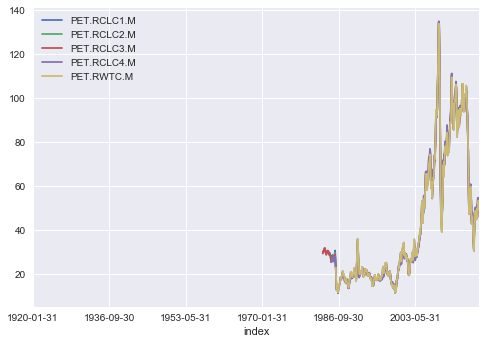

In [10]:
df.plot()
plt.show()

In [11]:
'Spot Price has '+ str(df['PET.RWTC.M'].count())+' months of Data'

'Spot Price has 376 months of Data'

### Spot Price starts January 1986

In [12]:
monthly_crude['PET.RWTC.M'][-df['PET.RWTC.M'].count():].head()

index
1986-01-31    22.93
1986-02-28    15.46
1986-03-31    12.61
1986-04-30    12.84
1986-05-31    15.38
Name: PET.RWTC.M, dtype: float64

### Set all data series to start January 1986

In [13]:
monthly_crude = monthly_crude.loc['1986-01-31':]
monthly_crude

,PET.RCLC3.M,PET.EER_EPLLPA_PF4_Y44MB_DPG.M,PET.EER_EPMRR_PE2_Y35NY_DPG.M,PET.RCLC4.M,PET.EER_EPD2DC_PF4_Y05LA_DPG.M,PET.EER_EPJK_PF4_RGC_DPG.M,PET.EER_EPD2F_PE4_Y35NY_DPG.M,PET.RCLC1.M,PET.EER_EPMRR_PE3_Y35NY_DPG.M,PET.EER_EPD2DXL0_PF4_RGC_DPG.M,...,PET.EMA_EPMMX_PWA_SIA_DPG.M,PET.EMA_EPMMX_PWA_SNH_DPG.M,PET.EMA_EPM0X_PRA_SOK_DPG.M,PET.EMA_EPMPX_PBS_SAK_DPG.M,PET.EMA_EPMPX_PTA_SGA_DPG.M,PET.EMA_EPMPX_PTA_SID_DPG.M,PET.EMA_EPMPX_PTC_SAL_DPG.M,PET.EMA_EPMMX_PTC_SME_DPG.M,PET.EMA_EPM0X_PRA_SKY_DPG.M,PET.EMA_EPM0X_PRA_SMI_DPG.M
index,,,,,,,,,,,,,,,,,,,,,
1986-01-31,21.94,NaN,NaN,21.66,NaN,NaN,NaN,22.98,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-02-28,15.83,NaN,NaN,15.94,NaN,NaN,NaN,15.46,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-31,13.12,NaN,NaN,13.28,NaN,NaN,NaN,12.62,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-04-30,12.57,NaN,NaN,12.62,NaN,NaN,NaN,12.75,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-05-31,14.44,NaN,NaN,14.29,NaN,NaN,NaN,15.26,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-06-30,13.01,NaN,NaN,13.04,NaN,NaN,NaN,13.38,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-07-31,11.35,NaN,NaN,11.49,NaN,NaN,NaN,11.58,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-08-31,14.96,NaN,NaN,14.94,NaN,NaN,NaN,15.11,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-09-30,15.02,NaN,NaN,14.91,NaN,NaN,NaN,14.94,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 'PET.RWTC.M' Will be the y value in our models

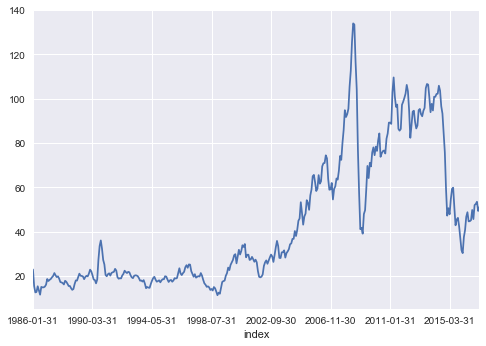

In [14]:
monthly_crude['PET.RWTC.M'].plot()

## Remove columns that are missing more than 10% of values

In [15]:
monthly_dataset = monthly_crude[monthly_crude.columns[monthly_crude.count() >= (.90 * monthly_crude['PET.RWTC.M'].count())]]
monthly_dataset.count()

PET.RCLC3.M                      376
PET.RCLC4.M                      376
PET.RCLC1.M                      376
PET.EER_EPD2F_PE1_Y35NY_DPG.M    376
PET.EER_EPD2F_PF4_Y35NY_DPG.M    371
PET.EER_EPD2F_PE3_Y35NY_DPG.M    376
PET.RWTC.M                       376
PET.EER_EPMRU_PF4_RGC_DPG.M      371
PET.EER_EPMRU_PF4_Y35NY_DPG.M    371
PET.RCLC2.M                      376
PET.RBRTE.M                      360
PET.MPPEXUS2.M                   373
PET.MGFRPP41.M                   374
PET.MOCLE2A2.M                   374
PET.MGFMXP2P31.M                 374
PET.MNSUPUS2.M                   374
PET.MBNUPP52.M                   374
PET.MTTUPP22.M                   374
PET.MWXEXP12.M                   374
PET.MOPUE3C2.M                   374
PET.MBNRPP42.M                   372
PET.MDIMRP51.M                   374
PET.MDISCP31.M                   374
PET.MNGSCP52.M                   374
PET.MGARPP22.M                   373
PET.MOHUA_NUS_2.M                374
PET.MPRFPUS1.M                   374
P

### Remove Price data from dataset

In [16]:
monthly_dataset = monthly_dataset.drop(['PET.RCLC1.M','PET.RCLC2.M','PET.RCLC3.M','PET.RCLC4.M','PET.RWTC.M'],axis=1)
monthly_dataset

,PET.EER_EPD2F_PE1_Y35NY_DPG.M,PET.EER_EPD2F_PF4_Y35NY_DPG.M,PET.EER_EPD2F_PE3_Y35NY_DPG.M,PET.EER_EPMRU_PF4_RGC_DPG.M,PET.EER_EPMRU_PF4_Y35NY_DPG.M,PET.RBRTE.M,PET.MPPEXUS2.M,PET.MGFRPP41.M,PET.MOCLE2A2.M,PET.MGFMXP2P31.M,...,PET.MPCRS_R2C_1.M,PET.MMSIMP21.M,PET.METIMUS1.M,PET.MMSIMP22.M,PET.METIMUS2.M,PET.MPFEXP31.M,PET.MNFEXUS2.M,PET.MPCEX_NUS-Z00_1.M,PET.MPCEX_NUS-Z00_2.M,PET.MPFEXP32.M
index,,,,,,,,,,,,,,,,,,,,,
1986-01-31,0.660,NaN,0.613,NaN,NaN,NaN,0.0,6835.0,2192.0,13610.0,...,54.0,6.0,1340.0,0.0,43.0,287.0,3.0,343.0,11.0,9.0
1986-02-28,0.519,NaN,0.465,NaN,NaN,NaN,5.0,5511.0,2217.0,11531.0,...,70.0,8.0,965.0,0.0,34.0,437.0,3.0,640.0,23.0,16.0
1986-03-31,0.472,NaN,0.402,NaN,NaN,NaN,4.0,6513.0,2217.0,12578.0,...,74.0,5.0,1024.0,0.0,33.0,381.0,3.0,514.0,17.0,12.0
1986-04-30,0.414,NaN,0.386,NaN,NaN,NaN,3.0,6695.0,2217.0,11051.0,...,59.0,32.0,590.0,1.0,20.0,527.0,7.0,1004.0,33.0,18.0
1986-05-31,0.432,NaN,0.432,NaN,NaN,NaN,3.0,7921.0,2217.0,15621.0,...,50.0,5.0,470.0,0.0,15.0,486.0,5.0,683.0,22.0,16.0
1986-06-30,0.375,0.380,0.401,0.409,0.420,NaN,0.0,7936.0,2198.0,15816.0,...,47.0,6.0,72.0,0.0,2.0,370.0,2.0,765.0,26.0,12.0
1986-07-31,0.334,0.334,0.360,0.334,0.340,NaN,3.0,8173.0,2198.0,14334.0,...,59.0,4.0,164.0,0.0,5.0,241.0,3.0,356.0,11.0,8.0
1986-08-31,0.420,0.408,0.447,0.416,0.426,NaN,3.0,8085.0,2153.0,14636.0,...,64.0,1.0,196.0,0.0,6.0,200.0,4.0,689.0,22.0,6.0
1986-09-30,0.413,0.402,0.448,0.398,0.420,NaN,2.0,7109.0,2153.0,14487.0,...,64.0,3.0,340.0,0.0,11.0,633.0,3.0,767.0,26.0,21.0


## Remove NaN's

In [17]:
monthly_dataset.fillna(0,inplace=True)
monthly_dataset

,PET.EER_EPD2F_PE1_Y35NY_DPG.M,PET.EER_EPD2F_PF4_Y35NY_DPG.M,PET.EER_EPD2F_PE3_Y35NY_DPG.M,PET.EER_EPMRU_PF4_RGC_DPG.M,PET.EER_EPMRU_PF4_Y35NY_DPG.M,PET.RBRTE.M,PET.MPPEXUS2.M,PET.MGFRPP41.M,PET.MOCLE2A2.M,PET.MGFMXP2P31.M,...,PET.MPCRS_R2C_1.M,PET.MMSIMP21.M,PET.METIMUS1.M,PET.MMSIMP22.M,PET.METIMUS2.M,PET.MPFEXP31.M,PET.MNFEXUS2.M,PET.MPCEX_NUS-Z00_1.M,PET.MPCEX_NUS-Z00_2.M,PET.MPFEXP32.M
index,,,,,,,,,,,,,,,,,,,,,
1986-01-31,0.660,0.000,0.613,0.000,0.000,0.00,0.0,6835.0,2192.0,13610.0,...,54.0,6.0,1340.0,0.0,43.0,287.0,3.0,343.0,11.0,9.0
1986-02-28,0.519,0.000,0.465,0.000,0.000,0.00,5.0,5511.0,2217.0,11531.0,...,70.0,8.0,965.0,0.0,34.0,437.0,3.0,640.0,23.0,16.0
1986-03-31,0.472,0.000,0.402,0.000,0.000,0.00,4.0,6513.0,2217.0,12578.0,...,74.0,5.0,1024.0,0.0,33.0,381.0,3.0,514.0,17.0,12.0
1986-04-30,0.414,0.000,0.386,0.000,0.000,0.00,3.0,6695.0,2217.0,11051.0,...,59.0,32.0,590.0,1.0,20.0,527.0,7.0,1004.0,33.0,18.0
1986-05-31,0.432,0.000,0.432,0.000,0.000,0.00,3.0,7921.0,2217.0,15621.0,...,50.0,5.0,470.0,0.0,15.0,486.0,5.0,683.0,22.0,16.0
1986-06-30,0.375,0.380,0.401,0.409,0.420,0.00,0.0,7936.0,2198.0,15816.0,...,47.0,6.0,72.0,0.0,2.0,370.0,2.0,765.0,26.0,12.0
1986-07-31,0.334,0.334,0.360,0.334,0.340,0.00,3.0,8173.0,2198.0,14334.0,...,59.0,4.0,164.0,0.0,5.0,241.0,3.0,356.0,11.0,8.0
1986-08-31,0.420,0.408,0.447,0.416,0.426,0.00,3.0,8085.0,2153.0,14636.0,...,64.0,1.0,196.0,0.0,6.0,200.0,4.0,689.0,22.0,6.0
1986-09-30,0.413,0.402,0.448,0.398,0.420,0.00,2.0,7109.0,2153.0,14487.0,...,64.0,3.0,340.0,0.0,11.0,633.0,3.0,767.0,26.0,21.0


In [18]:
X = monthly_dataset

print(np.shape(X))
X

(376, 3865)


,PET.EER_EPD2F_PE1_Y35NY_DPG.M,PET.EER_EPD2F_PF4_Y35NY_DPG.M,PET.EER_EPD2F_PE3_Y35NY_DPG.M,PET.EER_EPMRU_PF4_RGC_DPG.M,PET.EER_EPMRU_PF4_Y35NY_DPG.M,PET.RBRTE.M,PET.MPPEXUS2.M,PET.MGFRPP41.M,PET.MOCLE2A2.M,PET.MGFMXP2P31.M,...,PET.MPCRS_R2C_1.M,PET.MMSIMP21.M,PET.METIMUS1.M,PET.MMSIMP22.M,PET.METIMUS2.M,PET.MPFEXP31.M,PET.MNFEXUS2.M,PET.MPCEX_NUS-Z00_1.M,PET.MPCEX_NUS-Z00_2.M,PET.MPFEXP32.M
index,,,,,,,,,,,,,,,,,,,,,
1986-01-31,0.660,0.000,0.613,0.000,0.000,0.00,0.0,6835.0,2192.0,13610.0,...,54.0,6.0,1340.0,0.0,43.0,287.0,3.0,343.0,11.0,9.0
1986-02-28,0.519,0.000,0.465,0.000,0.000,0.00,5.0,5511.0,2217.0,11531.0,...,70.0,8.0,965.0,0.0,34.0,437.0,3.0,640.0,23.0,16.0
1986-03-31,0.472,0.000,0.402,0.000,0.000,0.00,4.0,6513.0,2217.0,12578.0,...,74.0,5.0,1024.0,0.0,33.0,381.0,3.0,514.0,17.0,12.0
1986-04-30,0.414,0.000,0.386,0.000,0.000,0.00,3.0,6695.0,2217.0,11051.0,...,59.0,32.0,590.0,1.0,20.0,527.0,7.0,1004.0,33.0,18.0
1986-05-31,0.432,0.000,0.432,0.000,0.000,0.00,3.0,7921.0,2217.0,15621.0,...,50.0,5.0,470.0,0.0,15.0,486.0,5.0,683.0,22.0,16.0
1986-06-30,0.375,0.380,0.401,0.409,0.420,0.00,0.0,7936.0,2198.0,15816.0,...,47.0,6.0,72.0,0.0,2.0,370.0,2.0,765.0,26.0,12.0
1986-07-31,0.334,0.334,0.360,0.334,0.340,0.00,3.0,8173.0,2198.0,14334.0,...,59.0,4.0,164.0,0.0,5.0,241.0,3.0,356.0,11.0,8.0
1986-08-31,0.420,0.408,0.447,0.416,0.426,0.00,3.0,8085.0,2153.0,14636.0,...,64.0,1.0,196.0,0.0,6.0,200.0,4.0,689.0,22.0,6.0
1986-09-30,0.413,0.402,0.448,0.398,0.420,0.00,2.0,7109.0,2153.0,14487.0,...,64.0,3.0,340.0,0.0,11.0,633.0,3.0,767.0,26.0,21.0


In [19]:
y = monthly_crude['PET.RWTC.M'].values
print(y.dtype)
print(np.shape(y))
y

float64
(376,)


array([  22.93,   15.46,   12.61,   12.84,   15.38,   13.43,   11.59,
         15.1 ,   14.87,   14.9 ,   15.22,   16.11,   18.65,   17.75,
         18.3 ,   18.68,   19.44,   20.07,   21.34,   20.31,   19.53,
         19.86,   18.85,   17.28,   17.13,   16.8 ,   16.2 ,   17.86,
         17.42,   16.53,   15.5 ,   15.52,   14.54,   13.77,   14.14,
         16.38,   18.02,   17.94,   19.48,   21.07,   20.12,   20.05,
         19.78,   18.58,   19.59,   20.1 ,   19.86,   21.1 ,   22.86,
         22.11,   20.39,   18.43,   18.2 ,   16.7 ,   18.45,   27.31,
         33.51,   36.04,   32.33,   27.28,   25.23,   20.48,   19.9 ,
         20.83,   21.23,   20.19,   21.4 ,   21.69,   21.89,   23.23,
         22.46,   19.5 ,   18.79,   19.01,   18.92,   20.23,   20.98,
         22.39,   21.78,   21.34,   21.88,   21.69,   20.34,   19.41,
         19.03,   20.09,   20.32,   20.25,   19.95,   19.09,   17.89,
         18.01,   17.5 ,   18.15,   16.61,   14.52,   15.03,   14.78,
         14.68,   16

### Run Test sklearn model on dataset

In [22]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.9 * (1 - .9)))
sel.fit_transform(monthly_dataset)

array([[  6.60000000e-01,   0.00000000e+00,   6.13000000e-01, ...,
          3.43000000e+02,   1.10000000e+01,   9.00000000e+00],
       [  5.19000000e-01,   0.00000000e+00,   4.65000000e-01, ...,
          6.40000000e+02,   2.30000000e+01,   1.60000000e+01],
       [  4.72000000e-01,   0.00000000e+00,   4.02000000e-01, ...,
          5.14000000e+02,   1.70000000e+01,   1.20000000e+01],
       ..., 
       [  1.64100000e+00,   1.56200000e+00,   1.66000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.53600000e+00,   1.49200000e+00,   1.55100000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.59000000e+00,   1.52300000e+00,   1.60400000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [23]:
_1 = sel.fit_transform(monthly_dataset)
np.shape(_1)

(376, 3842)

# Dimentionality Reduction

### patrick notes on dim. redu. 
- outside list of columns
- run the rfe
- run function to remove high multicolinearity
- run rfe again, appending to outside list of columns, until issue of multicolin is resolved

# RFE

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [28]:
#use linear regression as the model
lr_rfe = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr_rfe,step=10, n_features_to_select=50)
rfe.fit(monthly_dataset,y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=50, step=10, verbose=0)

In [29]:
print ("Features sorted by their rank:")
tuple_list_rfe = (sorted(zip(map(lambda x: round(x, 2), rfe.ranking_), monthly_dataset.columns)))
print (tuple_list_rfe)

Features sorted by their rank:
[(1, 'PET.A123620471.M'), (1, 'PET.A123650001.M'), (1, 'PET.A203720211.M'), (1, 'PET.A203720401.M'), (1, 'PET.C100010001.M'), (1, 'PET.C100011001.M'), (1, 'PET.C100012001.M'), (1, 'PET.C100013001.M'), (1, 'PET.C100030221.M'), (1, 'PET.C120030221.M'), (1, 'PET.C290013121.M'), (1, 'PET.C290013451.M'), (1, 'PET.C290030221.M'), (1, 'PET.C290030281.M'), (1, 'PET.C500012361.M'), (1, 'PET.C500050321.M'), (1, 'PET.MAPEXP21.M'), (1, 'PET.MBCMTP1P31.M'), (1, 'PET.MBIRPP21.M'), (1, 'PET.MBIRPUS1.M'), (1, 'PET.MBNEXP31.M'), (1, 'PET.MBNRI2C1.M'), (1, 'PET.MBNRI3B1.M'), (1, 'PET.MCRMXP2P41.M'), (1, 'PET.METFPP21.M'), (1, 'PET.MLPMPP3P21.M'), (1, 'PET.MLPMSP21.M'), (1, 'PET.MLPRIEC1.M'), (1, 'PET.MNGRIEC1.M'), (1, 'PET.MNGRIP11.M'), (1, 'PET.MOHRI2A1.M'), (1, 'PET.MOHRIP21.M'), (1, 'PET.MPEMXP2P11.M'), (1, 'PET.MPPMPP3P21.M'), (1, 'PET.MPPMRP31.M'), (1, 'PET.MPPMSP21.M'), (1, 'PET.MPPMXP3P21.M'), (1, 'PET.MTTMPP3P51.M'), (1, 'PET.MTTMPP4P21.M'), (1, 'PET.MTTMTP3P51.M')

In [30]:
name_list_rfe = [x[1] for x in tuple_list_rfe if x[0] == 1]
name_list_rfe

['PET.A123620471.M',
 'PET.A123650001.M',
 'PET.A203720211.M',
 'PET.A203720401.M',
 'PET.C100010001.M',
 'PET.C100011001.M',
 'PET.C100012001.M',
 'PET.C100013001.M',
 'PET.C100030221.M',
 'PET.C120030221.M',
 'PET.C290013121.M',
 'PET.C290013451.M',
 'PET.C290030221.M',
 'PET.C290030281.M',
 'PET.C500012361.M',
 'PET.C500050321.M',
 'PET.MAPEXP21.M',
 'PET.MBCMTP1P31.M',
 'PET.MBIRPP21.M',
 'PET.MBIRPUS1.M',
 'PET.MBNEXP31.M',
 'PET.MBNRI2C1.M',
 'PET.MBNRI3B1.M',
 'PET.MCRMXP2P41.M',
 'PET.METFPP21.M',
 'PET.MLPMPP3P21.M',
 'PET.MLPMSP21.M',
 'PET.MLPRIEC1.M',
 'PET.MNGRIEC1.M',
 'PET.MNGRIP11.M',
 'PET.MOHRI2A1.M',
 'PET.MOHRIP21.M',
 'PET.MPEMXP2P11.M',
 'PET.MPPMPP3P21.M',
 'PET.MPPMRP31.M',
 'PET.MPPMSP21.M',
 'PET.MPPMXP3P21.M',
 'PET.MTTMPP3P51.M',
 'PET.MTTMPP4P21.M',
 'PET.MTTMTP3P51.M',
 'PET.MTTMXP2P11.M',
 'PET.MTTMXP3P51.M',
 'PET.MTTMXP4P21.M',
 'PET.MTTRIAP1.M',
 'PET.MUOMTP3P21.M',
 'PET.MUOMXP3P21.M',
 'PET.R0000____3.M',
 'PET.R1200____3.M',
 'PET.R1300____3.M',
 'P

In [33]:
results_rfe = monthly_dataset[name_list_rfe]
results_rfe.tail()

,PET.A123620471.M,PET.A123650001.M,PET.A203720211.M,PET.A203720401.M,PET.C100010001.M,PET.C100011001.M,PET.C100012001.M,PET.C100013001.M,PET.C100030221.M,PET.C120030221.M,...,PET.MTTMXP2P11.M,PET.MTTMXP3P51.M,PET.MTTMXP4P21.M,PET.MTTRIAP1.M,PET.MUOMTP3P21.M,PET.MUOMXP3P21.M,PET.R0000____3.M,PET.R1200____3.M,PET.R1300____3.M,PET.RBRTE.M
index,,,,,,,,,,,,,,,,,,,,,
2016-12-31,0.0,3944.5,1821.8,6137.6,123591.8,17503.7,41898.3,64189.8,7356.7,6728.1,...,13935.0,22.0,13154.0,9409.0,408.0,408.0,48.66,50.45,46.72,53.29
2017-01-31,0.0,3862.0,1866.3,4411.0,114496.0,16112.2,38777.5,59606.3,7179.5,6619.1,...,12723.0,0.0,13508.0,8610.0,581.0,581.0,49.99,51.81,48.12,54.58
2017-02-28,0.0,3984.8,1861.5,4689.6,119515.6,16419.1,39691.9,63404.6,7291.9,6681.3,...,11547.0,19.0,12850.0,8081.0,460.0,460.0,51.11,52.87,49.38,54.87
2017-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,48.54,50.11,46.46,51.59
2017-04-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,52.31


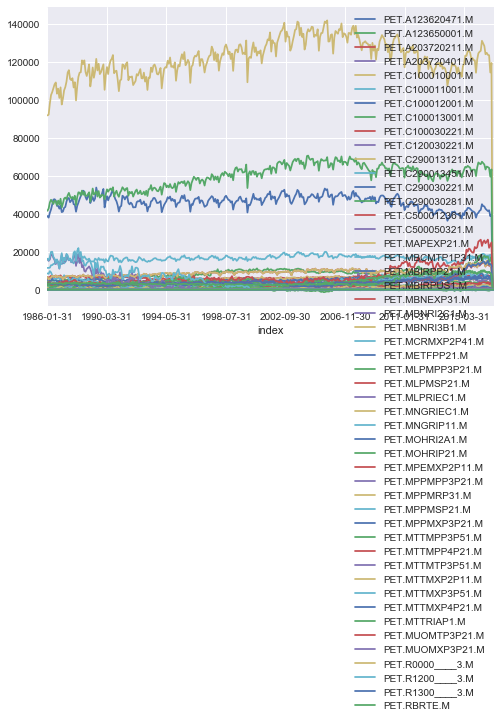

In [34]:
results_rfe.plot()

# RFECV

In [36]:
from sklearn.feature_selection import RFECV

In [40]:
#use linear regression as the model
lr_rfecv = LinearRegression()
rfecv = RFECV(lr_rfecv,step=100,cv=50)
rfecv.fit(monthly_dataset,y)

RFECV(cv=50,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
   n_jobs=1, scoring=None, step=100, verbose=0)

In [41]:
print ("Features sorted by their rank:")
tuple_list_rfecv = (sorted(zip(map(lambda x: round(x, 2), rfecv.ranking_), monthly_dataset.columns)))
print (tuple_list_rfecv)

Features sorted by their rank:
[(1, 'PET.A203612421.M'), (1, 'PET.A203720171.M'), (1, 'PET.A203720181.M'), (1, 'PET.A203720211.M'), (1, 'PET.A203730011.M'), (1, 'PET.A503750001.M'), (1, 'PET.A503750061.M'), (1, 'PET.C100010001.M'), (1, 'PET.C100011001.M'), (1, 'PET.C100012001.M'), (1, 'PET.C100013001.M'), (1, 'PET.C100040301.M'), (1, 'PET.C100050411.M'), (1, 'PET.C120013001.M'), (1, 'PET.C120020271.M'), (1, 'PET.C200020271.M'), (1, 'PET.C290013451.M'), (1, 'PET.C290020271.M'), (1, 'PET.C290050411.M'), (1, 'PET.C500040491.M'), (1, 'PET.E_ERTRR0_XR0_RUSON_C.M'), (1, 'PET.E_ERTRRO_XR0_NUS_C.M'), (1, 'PET.MAPMRP21.M'), (1, 'PET.MAPMRP31.M'), (1, 'PET.MAPMTP2P31.M'), (1, 'PET.MAPMTP3P21.M'), (1, 'PET.MAPMXP2P31.M'), (1, 'PET.MAPNRP31.M'), (1, 'PET.MBIRPP21.M'), (1, 'PET.MCRIM_NUS-NRS_2.M'), (1, 'PET.MCRMPP2P41.M'), (1, 'PET.MCRMSP11.M'), (1, 'PET.MCRMXP2P41.M'), (1, 'PET.MDIMRP31.M'), (1, 'PET.MDIMSP21.M'), (1, 'PET.MDIMXP3P21.M'), (1, 'PET.MGASTP11.M'), (1, 'PET.MGIRIUS2.M'), (1, 'PET.MKJM

In [43]:
name_list_rfecv = [x[1] for x in tuple_list_rfecv if x[0] == 1]
name_list_rfecv

['PET.A203612421.M',
 'PET.A203720171.M',
 'PET.A203720181.M',
 'PET.A203720211.M',
 'PET.A203730011.M',
 'PET.A503750001.M',
 'PET.A503750061.M',
 'PET.C100010001.M',
 'PET.C100011001.M',
 'PET.C100012001.M',
 'PET.C100013001.M',
 'PET.C100040301.M',
 'PET.C100050411.M',
 'PET.C120013001.M',
 'PET.C120020271.M',
 'PET.C200020271.M',
 'PET.C290013451.M',
 'PET.C290020271.M',
 'PET.C290050411.M',
 'PET.C500040491.M',
 'PET.E_ERTRR0_XR0_RUSON_C.M',
 'PET.E_ERTRRO_XR0_NUS_C.M',
 'PET.MAPMRP21.M',
 'PET.MAPMRP31.M',
 'PET.MAPMTP2P31.M',
 'PET.MAPMTP3P21.M',
 'PET.MAPMXP2P31.M',
 'PET.MAPNRP31.M',
 'PET.MBIRPP21.M',
 'PET.MCRIM_NUS-NRS_2.M',
 'PET.MCRMPP2P41.M',
 'PET.MCRMSP11.M',
 'PET.MCRMXP2P41.M',
 'PET.MDIMRP31.M',
 'PET.MDIMSP21.M',
 'PET.MDIMXP3P21.M',
 'PET.MGASTP11.M',
 'PET.MGIRIUS2.M',
 'PET.MKJMXP2P31.M',
 'PET.MKJSCP11.M',
 'PET.MKJSCP31.M',
 'PET.MKJSCP51.M',
 'PET.MKJSCUS1.M',
 'PET.MLPFPP21.M',
 'PET.MLUEXP31.M',
 'PET.MLUEXUS1.M',
 'PET.MLUMSP31.M',
 'PET.MLUNRP11.M',
 'PET

In [45]:
results_rfecv = monthly_dataset[name_list_rfecv]
results_rfecv.tail()

,PET.A203612421.M,PET.A203720171.M,PET.A203720181.M,PET.A203720211.M,PET.A203730011.M,PET.A503750001.M,PET.A503750061.M,PET.C100010001.M,PET.C100011001.M,PET.C100012001.M,...,PET.MPPRIP51.M,PET.MSGRPP11.M,PET.MSGUPP11.M,PET.MTTMPP1P21.M,PET.MTTMTP2P11.M,PET.MTTMTP3P21.M,PET.R0000____3.M,PET.R1200____3.M,PET.R1300____3.M,PET.RBRTE.M
index,,,,,,,,,,,,,,,,,,,,,
2016-12-31,256.4,5882.9,3493.2,1821.8,1392.0,8029.0,6788.6,123591.8,17503.7,41898.3,...,945.0,1308.0,1308.0,3427.0,113.0,3433.0,48.66,50.45,46.72,53.29
2017-01-31,305.1,5777.6,3205.5,1866.3,1400.7,7836.1,6560.3,114496.0,16112.2,38777.5,...,940.0,1343.0,1343.0,3382.0,246.0,3771.0,49.99,51.81,48.12,54.58
2017-02-28,258.7,5821.6,3484.4,1861.5,1518.5,7984.4,6752.8,119515.6,16419.1,39691.9,...,869.0,1184.0,1184.0,3118.0,170.0,3953.0,51.11,52.87,49.38,54.87
2017-03-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,48.54,50.11,46.46,51.59
2017-04-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,52.31


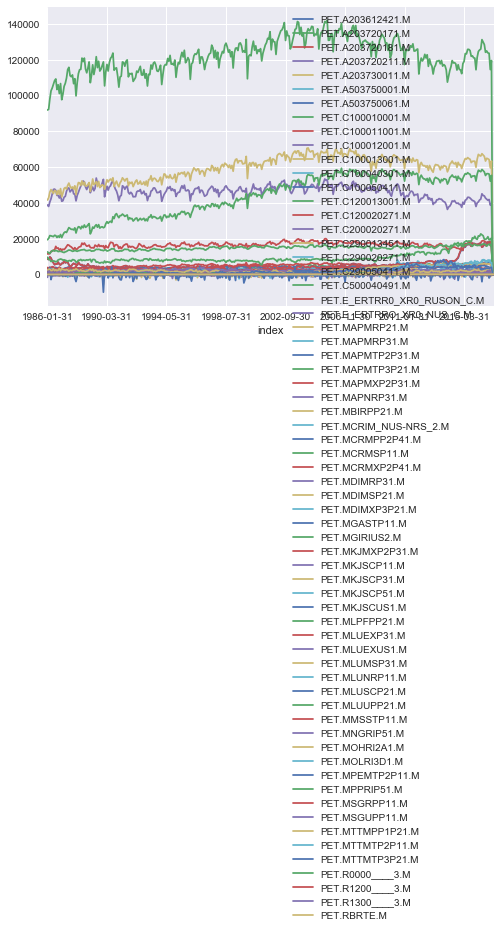

In [60]:
results_rfecv.plot()

# Both RFE and RFECV datasets have two months worth with zero values

### Lets find out what these factors are...

In [46]:
data = pd.read_json('./PET.txt',orient='columns',lines=True,convert_dates=['start','end'])
series_data = data[pd.notnull(data['series_id'])]
series_data = (series_data[['series_id','name','units','description','unitsshort','f','start','end','last_updated']]
 .set_index('series_id')
)
series_data['start']= pd.to_datetime(series_data['start'])
series_data['end']= pd.to_datetime(series_data['end'])

### Pass through list of 50 factors to obtain the description of the factors

In [47]:
series_data.loc[name_list_rfe]

,name,units,description,unitsshort,f,start,end,last_updated
series_id,,,,,,,,
PET.A123620471.M,Tennessee Regular Gasoline Retail Sales by Ref...,Thousand Gallons per Day,Tennessee Regular Gasoline Retail Sales by Ref...,Mgal/d,M,1970-01-03 07:05:01,1970-01-03 08:01:42,2017-05-01T14:58:24-04:00
PET.A123650001.M,West Coast (PADD 5) Regular Gasoline Retail Sa...,Thousand Gallons per Day,West Coast (PADD 5) Regular Gasoline Retail Sa...,Mgal/d,M,1970-01-03 07:05:01,1970-01-03 08:01:42,2017-05-01T14:58:24-04:00
PET.A203720211.M,Kentucky No 2 Distillate Wholesale/Resale Volu...,Thousand Gallons per Day,Kentucky No 2 Distillate Wholesale/Resale Volu...,Mgal/d,M,1970-01-03 07:05:01,1970-01-03 08:01:42,2017-05-01T14:58:24-04:00
PET.A203720401.M,Oklahoma No 2 Distillate Wholesale/Resale Volu...,Thousand Gallons per Day,Oklahoma No 2 Distillate Wholesale/Resale Volu...,Mgal/d,M,1970-01-03 07:05:01,1970-01-03 08:01:42,2017-05-01T14:58:24-04:00
PET.C100010001.M,East Coast (PADD 1) Total Gasoline All Sales/D...,Thousand Gallons per Day,East Coast (PADD 1) Total Gasoline All Sales/D...,Mgal/d,M,1970-01-03 07:05:01,1970-01-03 08:01:42,2017-04-21T11:42:10-04:00
PET.C100011001.M,New England (PADD 1A) Total Gasoline All Sales...,Thousand Gallons per Day,New England (PADD 1A) Total Gasoline All Sales...,Mgal/d,M,1970-01-03 07:05:01,1970-01-03 08:01:42,2017-04-21T11:42:10-04:00
PET.C100012001.M,Central Atlantic (PADD 1B) Total Gasoline All ...,Thousand Gallons per Day,Central Atlantic (PADD 1B) Total Gasoline All ...,Mgal/d,M,1970-01-03 07:05:01,1970-01-03 08:01:42,2017-04-21T11:42:10-04:00
PET.C100013001.M,Lower Atlantic (PADD 1C) Total Gasoline All Sa...,Thousand Gallons per Day,Lower Atlantic (PADD 1C) Total Gasoline All Sa...,Mgal/d,M,1970-01-03 07:05:01,1970-01-03 08:01:42,2017-04-21T11:42:10-04:00
PET.C100030221.M,Louisiana Total Gasoline All Sales/Deliveries ...,Thousand Gallons per Day,Louisiana Total Gasoline All Sales/Deliveries ...,Mgal/d,M,1970-01-03 07:05:01,1970-01-03 08:01:42,2017-04-21T11:42:10-04:00


In [48]:
series_data.loc[name_list_rfecv]

,name,units,description,unitsshort,f,start,end,last_updated
series_id,,,,,,,,
PET.A203612421.M,Pennsylvania No 2 Distillate Retail Sales by R...,Thousand Gallons per Day,Pennsylvania No 2 Distillate Retail Sales by R...,Mgal/d,M,1970-01-03 07:05:01,1970-01-03 08:01:42,2017-05-01T14:58:24-04:00
PET.A203720171.M,Illinois No 2 Distillate Wholesale/Resale Volu...,Thousand Gallons per Day,Illinois No 2 Distillate Wholesale/Resale Volu...,Mgal/d,M,1970-01-03 07:05:01,1970-01-03 08:01:42,2017-05-01T14:58:24-04:00
PET.A203720181.M,Indiana No 2 Distillate Wholesale/Resale Volum...,Thousand Gallons per Day,Indiana No 2 Distillate Wholesale/Resale Volum...,Mgal/d,M,1970-01-03 07:05:01,1970-01-03 08:01:42,2017-05-01T14:58:24-04:00
PET.A203720211.M,Kentucky No 2 Distillate Wholesale/Resale Volu...,Thousand Gallons per Day,Kentucky No 2 Distillate Wholesale/Resale Volu...,Mgal/d,M,1970-01-03 07:05:01,1970-01-03 08:01:42,2017-05-01T14:58:24-04:00
PET.A203730011.M,Alabama No 2 Distillate Wholesale/Resale Volum...,Thousand Gallons per Day,Alabama No 2 Distillate Wholesale/Resale Volum...,Mgal/d,M,1970-01-03 07:05:01,1970-01-03 08:01:42,2017-05-01T14:58:24-04:00
PET.A503750001.M,West Coast (PADD 5) Kerosene-Type Jet Fuel Who...,Thousand Gallons per Day,West Coast (PADD 5) Kerosene-Type Jet Fuel Who...,Mgal/d,M,1970-01-03 07:05:01,1970-01-03 08:01:42,2017-05-01T14:58:24-04:00
PET.A503750061.M,California Kerosene-Type Jet Fuel Wholesale/Re...,Thousand Gallons per Day,California Kerosene-Type Jet Fuel Wholesale/Re...,Mgal/d,M,1970-01-03 07:06:49,1970-01-03 08:01:42,2017-05-01T14:58:24-04:00
PET.C100010001.M,East Coast (PADD 1) Total Gasoline All Sales/D...,Thousand Gallons per Day,East Coast (PADD 1) Total Gasoline All Sales/D...,Mgal/d,M,1970-01-03 07:05:01,1970-01-03 08:01:42,2017-04-21T11:42:10-04:00
PET.C100011001.M,New England (PADD 1A) Total Gasoline All Sales...,Thousand Gallons per Day,New England (PADD 1A) Total Gasoline All Sales...,Mgal/d,M,1970-01-03 07:05:01,1970-01-03 08:01:42,2017-04-21T11:42:10-04:00


## Check array size

In [51]:
from sklearn.model_selection import train_test_split
from sklearn import cross_validation, preprocessing 
results_rfe = preprocessing.scale(results_rfe)
results_rfe

array([[-0.44061932, -1.19577736, -1.78024669, ..., -0.51675608,
        -0.51120361, -1.26405314],
       [-0.17048122, -1.11693147, -1.85431225, ..., -0.69616125,
        -0.73503822, -1.26405314],
       [ 0.20262871, -1.0921751 , -1.20725601, ..., -0.86563507,
        -0.86270928, -1.26405314],
       ..., 
       [-2.57858811, -1.30745144,  0.35571714, ...,  0.34695168,
         0.29125332,  0.34810286],
       [-2.57858811, -2.96542042, -4.69457711, ...,  0.25853056,
         0.19541797,  0.25173196],
       [-2.57858811, -2.96542042, -4.69457711, ..., -1.34682537,
        -1.32941429,  0.27288655]])

In [52]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(results_rfe[:-5], y[:-5], test_size=0.2)

In [54]:
lr_rfe.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
lr_rfe.score(X_test,y_test)

0.99749126311492875

In [58]:
lr_rfe.predict(results_rfe[-5:])

array([ 44.83230579,  49.21104546,  53.25536203,  56.67092885,  16.04858451])

In [59]:
y[-5:]

array([ 51.97,  52.5 ,  53.47,  49.33,  51.06])